<a href="https://colab.research.google.com/github/ryangpaiva/Neural-Networks/blob/master/neuralnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pickle 
import tensorflow as tf 
from sklearn.model_selection import train_test_split
import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
caminho ='./drive/My Drive/limaoP/limao/'
os.listdir(caminho)

['doentes', 'saudaveis']

In [ ]:
img_array = cv2.imread(caminho+'doentes/'+"img1.jpg", cv2.IMREAD_GRAYSCALE)       

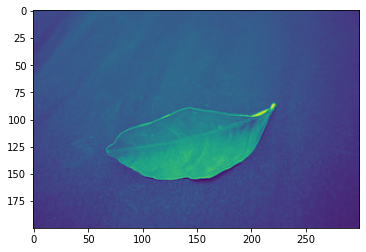

In [ ]:
%matplotlib inline
plt.imshow(img_array)
plt.show()

In [ ]:
def ftPlantas(caminho):

  subpasta = ['doentes', 'saudaveis']

  imagem = []
  rotulo = []

  for sub in subpasta:
    arquivos_img = os.listdir(caminho+sub)
    for imagens in arquivos_img:
      img_array = cv2.imread(caminho+sub+'/'+imagens, cv2.IMREAD_GRAYSCALE)
      img_array = cv2.resize(img_array, (30,20), interpolation = cv2.INTER_AREA)
      img_array = tf.keras.utils.normalize(img_array, axis = 1)
      img_array = img_array.reshape(-1)
      imagem.append(img_array)
      if sub == 'doentes':
        rotulo.append(1)
      else:
        rotulo.append(0)

  return np.asarray(rotulo), np.asarray(imagem) 

In [ ]:
rotulo, caracteristicas = ftPlantas(caminho)

In [ ]:
len(caracteristicas[0])

600

In [ ]:
caracteristicas_treino, caracteristicas_teste, rotulo_treino, rotulo_test = train_test_split(caracteristicas, rotulo, test_size = 0.2, random_state = 10)

In [ ]:
model = keras.Sequential()

model.add(keras.layers.core.Dense(512, input_shape =tuple([caracteristicas.shape[1]]), activation='sigmoid'))

model.add(keras.layers.core.Dense(64, activation='relu'))
model.add(keras.layers.core.Dense(64, activation='relu'))

model.add(keras.layers.Dropout(rate=0.5))


model.add(keras.layers.core.Dense(2, activation='sigmoid'))

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [ ]:
print(model.summary())

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_92 (Dense)             (None, 512)               307712    
_________________________________________________________________
dense_93 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_94 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_95 (Dense)             (None, 2)                 130       
Total params: 344,834
Trainable params: 344,834
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit(caracteristicas_treino, rotulo_treino, epochs=300)

Epoch 1/300
998/998 [==============================] - 0s 236us/step - loss: 0.3765 - accuracy: 0.8457
Epoch 2/300
998/998 [==============================] - 0s 208us/step - loss: 0.3579 - accuracy: 0.8507
Epoch 3/300
998/998 [==============================] - 0s 206us/step - loss: 0.3603 - accuracy: 0.8497
Epoch 4/300
998/998 [==============================] - 0s 200us/step - loss: 0.4061 - accuracy: 0.8257
Epoch 5/300
998/998 [==============================] - 0s 218us/step - loss: 0.3629 - accuracy: 0.8367
Epoch 6/300
998/998 [==============================] - 0s 227us/step - loss: 0.3926 - accuracy: 0.8246
Epoch 7/300
998/998 [==============================] - 0s 203us/step - loss: 0.4147 - accuracy: 0.8136
Epoch 8/300
998/998 [==============================] - 0s 204us/step - loss: 0.3602 - accuracy: 0.8387
Epoch 9/300
998/998 [==============================] - 0s 212us/step - loss: 0.3571 - accuracy: 0.8347
Epoch 10/300
998/998 [==============================] - 0s 212us/step - l

In [ ]:
model.evaluate(caracteristicas_treino, rotulo_treino)

998/998 [==============================] - 0s 81us/step


[0.20729550953678233, 0.9128256440162659]

In [ ]:
predictions = model.predict(caracteristicas_teste)
predictions[0:5]

array([[9.1062254e-01, 1.1044407e-01],
       [2.2310019e-04, 9.9910867e-01],
       [5.4498017e-01, 2.7830946e-01],
       [4.3513009e-01, 3.3797634e-01],
       [3.1396747e-04, 9.9875605e-01]], dtype=float32)

In [ ]:
rotulo_pred = ["saudavel" if x[0] > x[1] else "doente" for x in predictions]
rotulo_pred[0:10]

['saudavel',
 'doente',
 'saudavel',
 'saudavel',
 'doente',
 'saudavel',
 'saudavel',
 'saudavel',
 'saudavel',
 'doente']